In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('ggplot')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../artifacts/raw/train.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,713071383,Existing Customer,54,F,1,Unknown,Single,Unknown,Blue,36,...,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,0.000312,0.999690
1,714246333,Attrited Customer,58,F,4,High School,Married,Unknown,Blue,48,...,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0.997330,0.002675
2,718206783,Existing Customer,45,F,4,Unknown,Single,Less than $40K,Gold,36,...,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,0.000123,0.999880
3,721096983,Existing Customer,34,F,2,Graduate,Single,Less than $40K,Blue,36,...,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,0.000516,0.999480
4,720028683,Existing Customer,49,F,2,High School,Married,$40K - $60K,Blue,39,...,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,0.000502,0.999500


In [4]:
for column in df.columns:
    print("Column name: " + column)

print("Column count: " + str(len(df.columns)))


Column name: CLIENTNUM
Column name: Attrition_Flag
Column name: Customer_Age
Column name: Gender
Column name: Dependent_count
Column name: Education_Level
Column name: Marital_Status
Column name: Income_Category
Column name: Card_Category
Column name: Months_on_book
Column name: Total_Relationship_Count
Column name: Months_Inactive_12_mon
Column name: Contacts_Count_12_mon
Column name: Credit_Limit
Column name: Total_Revolving_Bal
Column name: Avg_Open_To_Buy
Column name: Total_Amt_Chng_Q4_Q1
Column name: Total_Trans_Amt
Column name: Total_Trans_Ct
Column name: Total_Ct_Chng_Q4_Q1
Column name: Avg_Utilization_Ratio
Column name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Column name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Column count: 23


In [5]:
# Dropping the last two columns and the client number column

df = df.iloc[:,1:-2]
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464
1,Attrited Customer,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334
2,Existing Customer,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103
3,Existing Customer,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694
4,Existing Customer,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708


In [6]:
# Checking for the number of null values present in each feature

round((df.isnull().sum() * 100)/(df.shape[0]),2)

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

No Null Values

## Checking the target variable

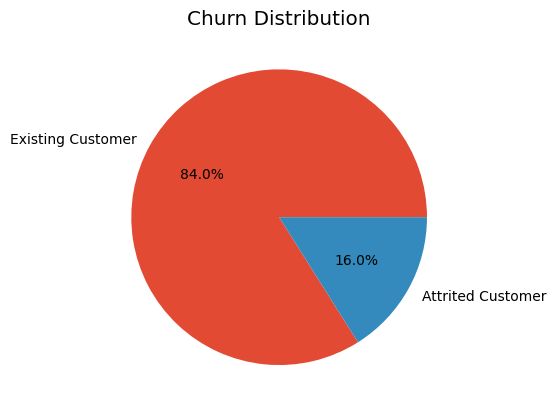

In [7]:
target = df['Attrition_Flag'].value_counts()

plt.pie(target, labels = target.index, autopct = '%1.1f%%')
plt.title('Churn Distribution')
plt.show()

## Checking the distribution of the demographic features


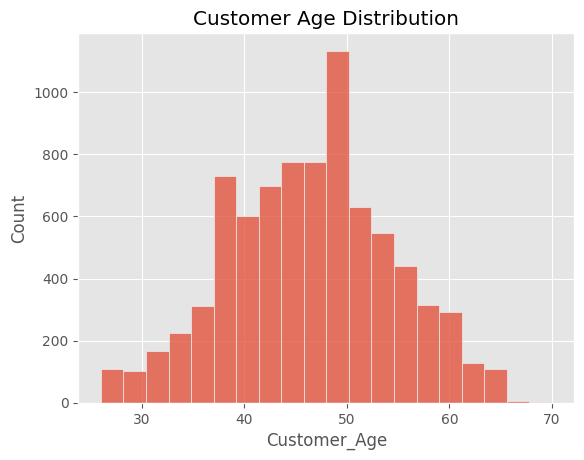

In [8]:
sns.histplot(x = 'Customer_Age', data = df, bins = 20)
plt.title('Customer Age Distribution')
plt.show()

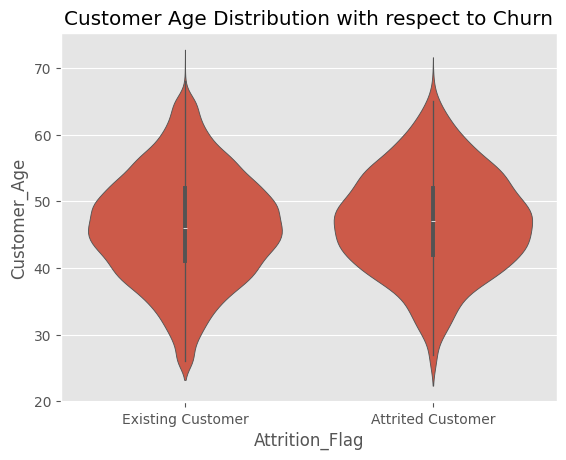

In [9]:
# Checking the distribution of the customer age with respect to the churn

sns.violinplot(x = 'Attrition_Flag', y = 'Customer_Age', data = df)
plt.title('Customer Age Distribution with respect to Churn')
plt.show()

### Gender

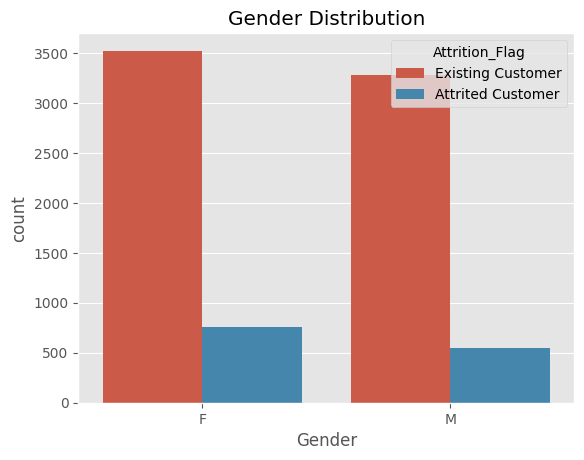

In [10]:
sns.countplot(x = 'Gender', data=df, hue = 'Attrition_Flag')
plt.title('Gender Distribution')
plt.show()

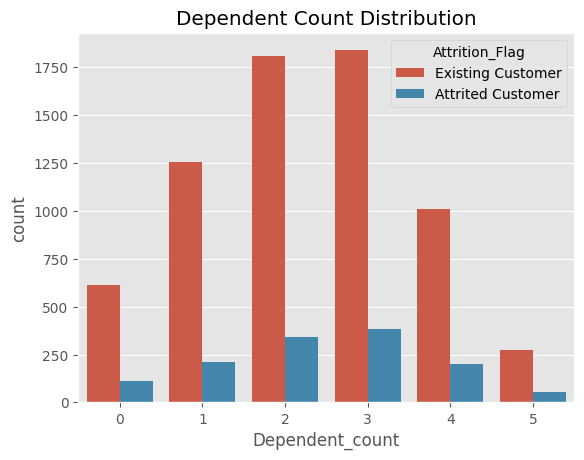

In [11]:
sns.countplot(x = 'Dependent_count', data=df, hue = 'Attrition_Flag')
plt.title('Dependent Count Distribution')
plt.show()

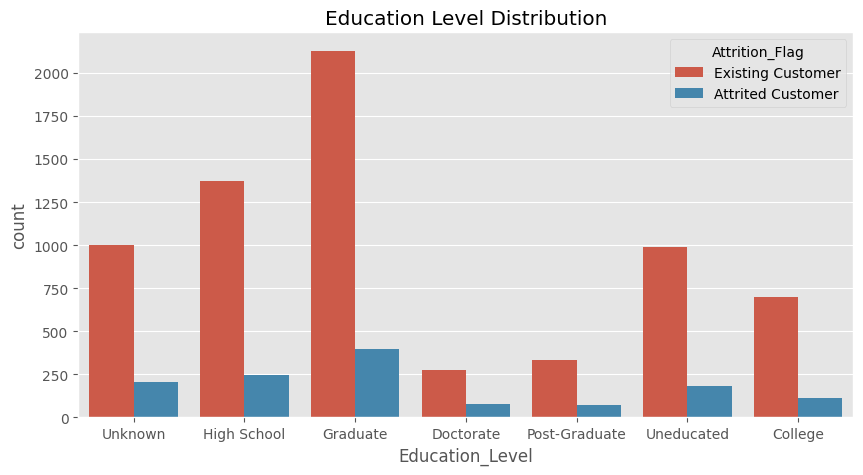

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Education_Level', data=df, hue = 'Attrition_Flag')
plt.title('Education Level Distribution')
plt.show()

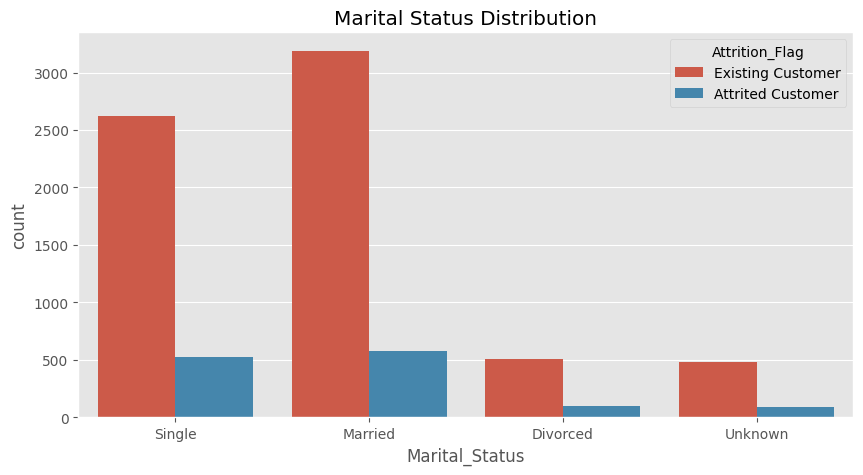

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Marital_Status', data=df, hue = 'Attrition_Flag')
plt.title('Marital Status Distribution')
plt.show()

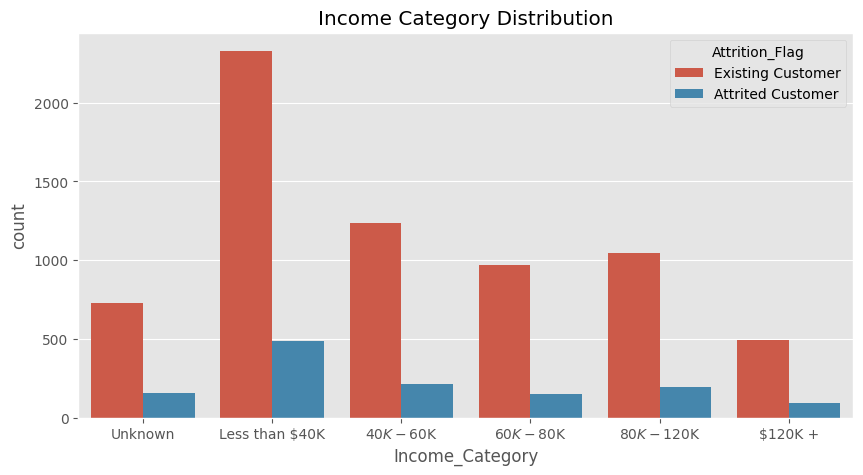

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Income_Category', data=df, hue = 'Attrition_Flag')
plt.title('Income Category Distribution')
plt.show()

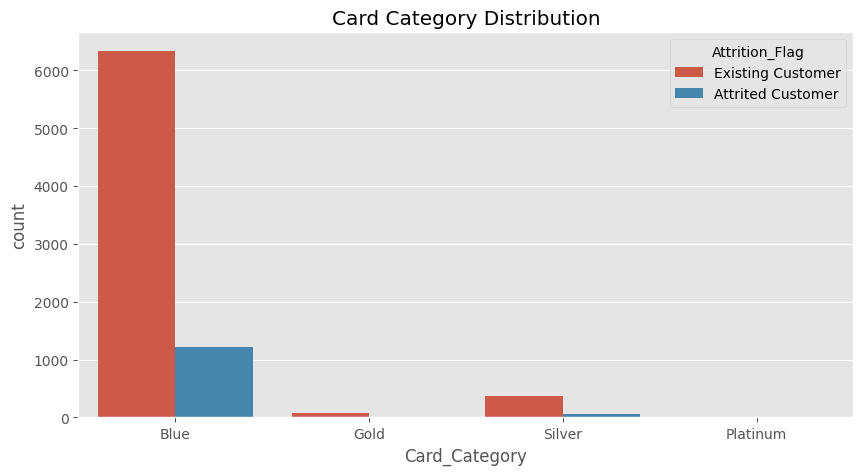

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Card_Category', data=df, hue = 'Attrition_Flag')
plt.title('Card Category Distribution')
plt.show()

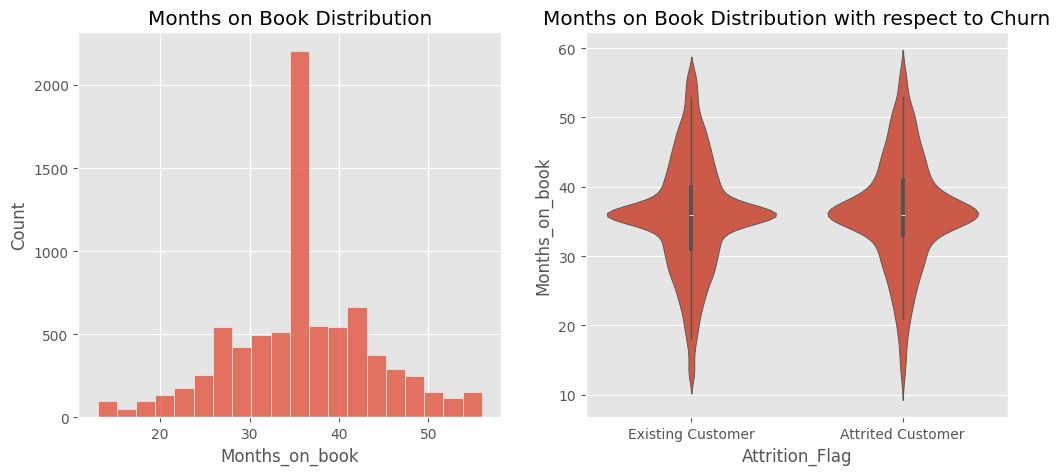

In [16]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.histplot(x = 'Months_on_book', data = df, bins = 20, ax = axs[0])
axs[0].set_title('Months on Book Distribution')

sns.violinplot(x = 'Attrition_Flag', y = 'Months_on_book', data = df, ax = axs[1])
axs[1].set_title('Months on Book Distribution with respect to Churn')

plt.show()


In [17]:
print(f'Kurtosis of Months on book features is : {df["Months_on_book"].kurt():.2f}')
print(f'Skewness of Months on book features is : {df["Months_on_book"].skew():.2f}')

Kurtosis of Months on book features is : 0.36
Skewness of Months on book features is : -0.11


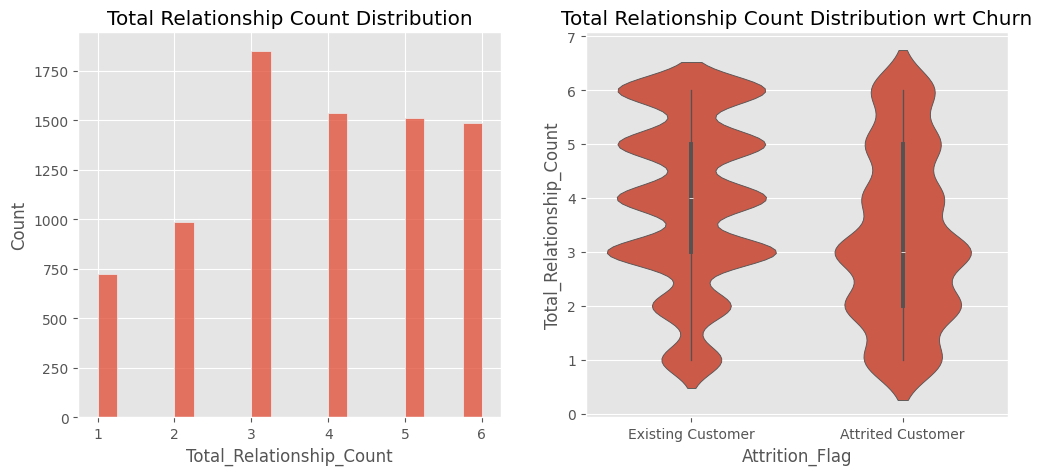

In [18]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.histplot(x = 'Total_Relationship_Count', data = df, bins = 20, ax = axs[0])
axs[0].set_title('Total Relationship Count Distribution')

sns.violinplot(x = 'Attrition_Flag', y = 'Total_Relationship_Count', data = df, ax = axs[1])
axs[1].set_title('Total Relationship Count Distribution wrt Churn')

plt.show()


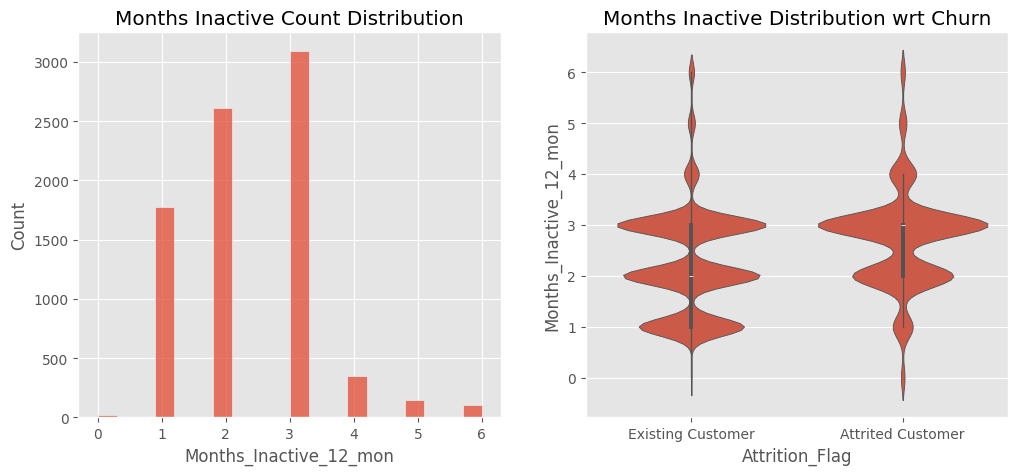

In [19]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.histplot(x = 'Months_Inactive_12_mon', data = df, bins = 20, ax = axs[0])
axs[0].set_title('Months Inactive Count Distribution')

sns.violinplot(x = 'Attrition_Flag', y = 'Months_Inactive_12_mon', data = df, ax = axs[1])
axs[1].set_title('Months Inactive Distribution wrt Churn')

plt.show()


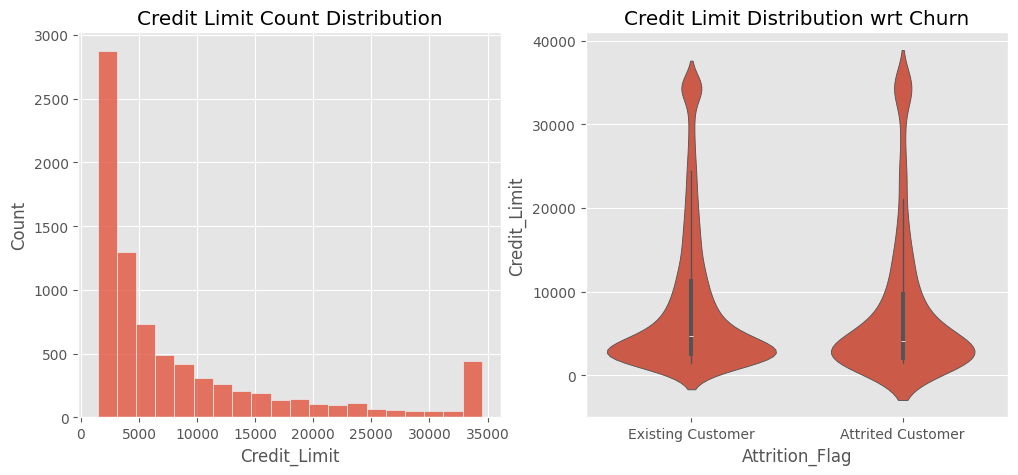

In [20]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.histplot(x = 'Credit_Limit', data = df, bins = 20, ax = axs[0])
axs[0].set_title('Credit Limit Count Distribution')

sns.violinplot(x = 'Attrition_Flag', y = 'Credit_Limit', data = df, ax = axs[1])
axs[1].set_title('Credit Limit Distribution wrt Churn')

plt.show()


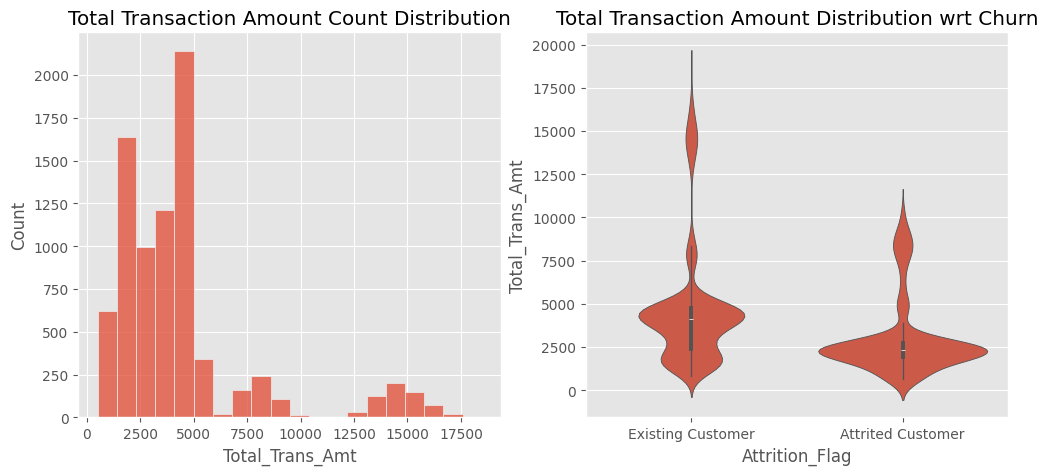

In [21]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.histplot(x = 'Total_Trans_Amt', data = df, bins = 20, ax = axs[0])
axs[0].set_title('Total Transaction Amount Count Distribution')

sns.violinplot(x = 'Attrition_Flag', y = 'Total_Trans_Amt', data = df, ax = axs[1])
axs[1].set_title('Total Transaction Amount Distribution wrt Churn')

plt.show()


## Data Processing

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            8101 non-null   object 
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   object 
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   object 
 5   Marital_Status            8101 non-null   object 
 6   Income_Category           8101 non-null   object 
 7   Card_Category             8101 non-null   object 
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_Open

In [23]:

def make_categorical(data: pd.DataFrame, column: str, categories: list, ordered: bool = False):
    data[column] = pd.Categorical(data[column], categories=categories, ordered=ordered)


In [24]:

make_categorical(
    df, 
    'Marital_Status', 
    ['Unknown', 'Single', 'Divorced', 'Married'], 
    ordered=True
)

make_categorical(
    df, 
    'Income_Category', 
    ['Unknown','Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'], 
    ordered=True
)

make_categorical(
    df, 
    'Card_Category', 
    ['Blue', 'Silver', 'Gold', 'Platinum'], 
    ordered=True
)

make_categorical(
    df,
    'Education_Level',
    ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
    ordered=True
)

In [25]:
# Prepare mapping dictionary
category_mappings = {}

# Ordinal features
ordinal_features = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in ordinal_features:
    categories = df[col].cat.categories
    codes = range(len(categories))
    category_mappings[col] = dict(zip(categories, codes))
    df[col] = df[col].cat.codes

# Binary features
binary_mappings = {
    'Attrition_Flag': {'Attrited Customer': 1, 'Existing Customer': 0},
    'Gender': {'F': 1, 'M': 0}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].replace(mapping)
    category_mappings[col] = mapping


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            8101 non-null   int64  
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   int64  
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   int8   
 5   Marital_Status            8101 non-null   int8   
 6   Income_Category           8101 non-null   int8   
 7   Card_Category             8101 non-null   int8   
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_Open

In [27]:
category_mappings

{'Education_Level': {'Unknown': 0,
  'Uneducated': 1,
  'High School': 2,
  'College': 3,
  'Graduate': 4,
  'Post-Graduate': 5,
  'Doctorate': 6},
 'Marital_Status': {'Unknown': 0, 'Single': 1, 'Divorced': 2, 'Married': 3},
 'Income_Category': {'Unknown': 0,
  'Less than $40K': 1,
  '$40K - $60K': 2,
  '$60K - $80K': 3,
  '$80K - $120K': 4,
  '$120K +': 5},
 'Card_Category': {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3},
 'Attrition_Flag': {'Attrited Customer': 1, 'Existing Customer': 0},
 'Gender': {'F': 1, 'M': 0}}

### Multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [29]:
X = add_constant(df)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,const,121.302187
1,Attrition_Flag,1.611389
2,Customer_Age,2.722101
3,Gender,2.767359
4,Dependent_count,1.038860
5,Education_Level,1.002298
6,Marital_Status,1.036745
7,Income_Category,2.943858
8,Card_Category,1.406358
9,Months_on_book,2.703517


In [30]:
# Credit Limit, Total_Revolving_Bal, Avg_Open_To_Buy have high VIF values

df[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']].head()

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
0,3723.0,1728,1995.0
1,5396.0,1803,3593.0
2,15987.0,1648,14339.0
3,3625.0,2517,1108.0
4,2720.0,1926,794.0


In [31]:
# Dropping one of them

df = df.drop(['Avg_Open_To_Buy'], axis=1)

In [32]:
X = add_constant(df)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,const,121.302187
1,Attrition_Flag,1.611389
2,Customer_Age,2.722101
3,Gender,2.767359
4,Dependent_count,1.038860
5,Education_Level,1.002298
6,Marital_Status,1.036745
7,Income_Category,2.943858
8,Card_Category,1.406358
9,Months_on_book,2.703517


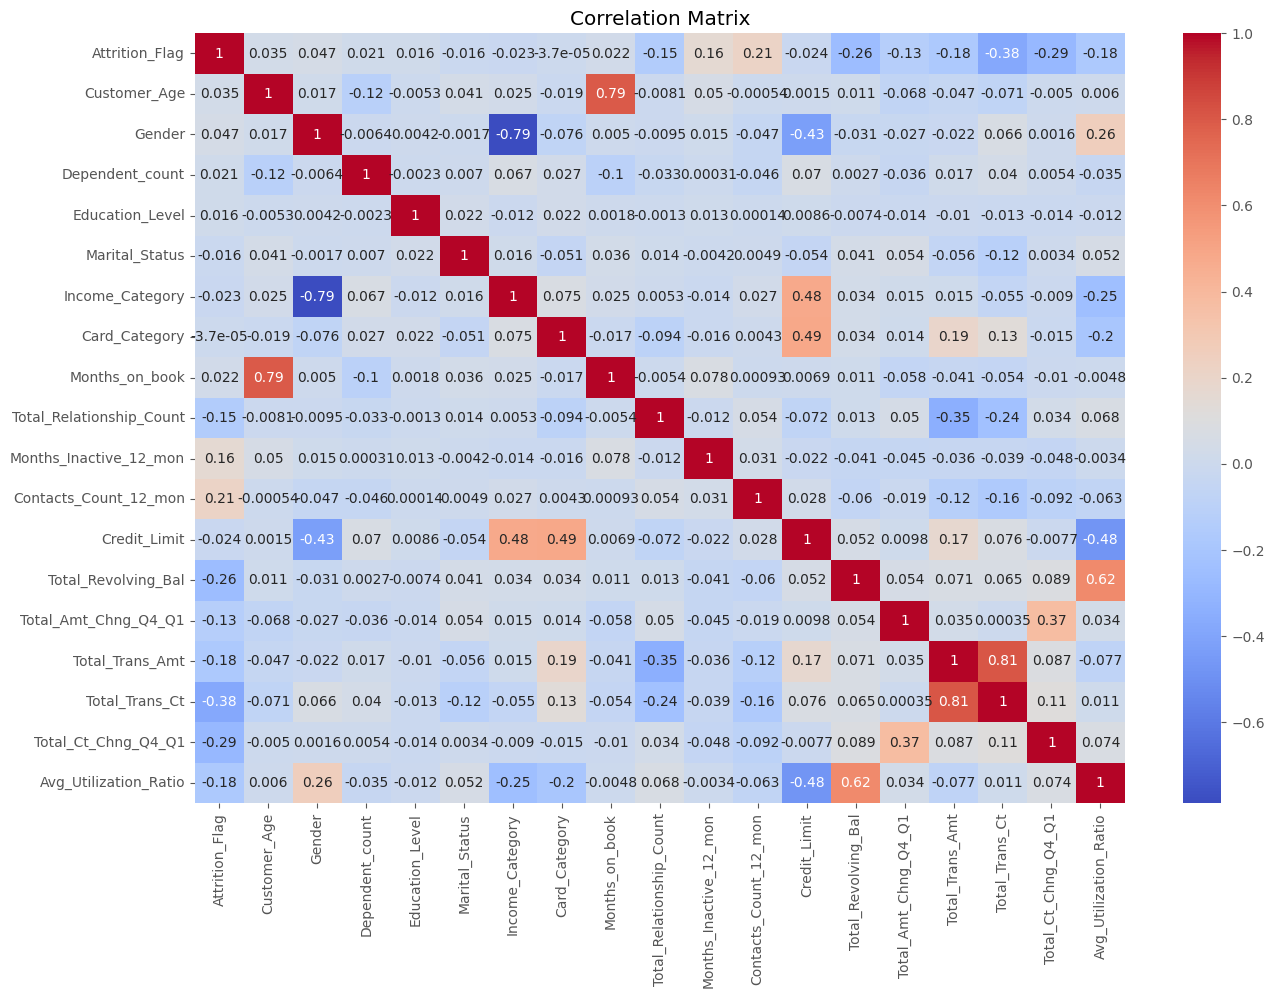

In [33]:
corr  = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Skewness

In [34]:
skweness = df.skew()
skweness

Attrition_Flag              1.850393
Customer_Age               -0.043813
Gender                     -0.113026
Dependent_count            -0.020168
Education_Level            -0.009437
Marital_Status             -0.223267
Income_Category             0.457674
Card_Category               4.629832
Months_on_book             -0.109430
Total_Relationship_Count   -0.163127
Months_Inactive_12_mon      0.644258
Contacts_Count_12_mon       0.020659
Credit_Limit                1.657609
Total_Revolving_Bal        -0.144484
Total_Amt_Chng_Q4_Q1        1.491324
Total_Trans_Amt             2.047951
Total_Trans_Ct              0.153617
Total_Ct_Chng_Q4_Q1         2.126865
Avg_Utilization_Ratio       0.726094
dtype: float64

They are not highly skewed, so we can proceed with the model building

## Imbalanced Data

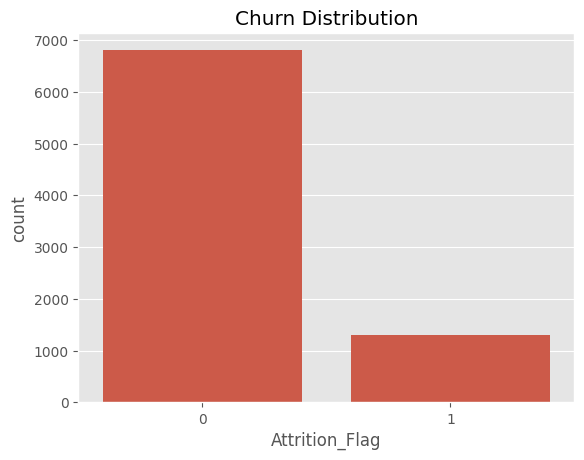

In [35]:
sns.countplot(x = 'Attrition_Flag', data=df)
plt.title('Churn Distribution')
plt.show()

In [36]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [37]:
X.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [40]:
y_res.value_counts()

Attrition_Flag
0    6801
1    6801
Name: count, dtype: int64

In [41]:
balanced_df = pd.concat([X_res, y_res], axis=1)
balanced_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,54,1,1,0,1,0,0,36,1,3,3,3723.0,1728,0.595,8554,99,0.678,0.464,0
1,58,1,4,2,3,0,0,48,1,4,3,5396.0,1803,0.493,2107,39,0.393,0.334,1
2,45,1,4,0,1,1,2,36,6,1,3,15987.0,1648,0.732,1436,36,1.250,0.103,0
3,34,1,2,4,1,1,0,36,4,3,4,3625.0,2517,1.158,2616,46,1.300,0.694,0
4,49,1,2,2,3,2,0,39,5,3,4,2720.0,1926,0.602,3806,61,0.794,0.708,0


## Feature Selection

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
X, y = balanced_df.drop('Attrition_Flag', axis=1), balanced_df['Attrition_Flag']
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [45]:
feature_importance = clf.feature_importances_

In [47]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df

,feature,importance
14,Total_Trans_Amt,0.229285
15,Total_Trans_Ct,0.224893
16,Total_Ct_Chng_Q4_Q1,0.094721
12,Total_Revolving_Bal,0.091878
17,Avg_Utilization_Ratio,0.071722
8,Total_Relationship_Count,0.066605
13,Total_Amt_Chng_Q4_Q1,0.053327
11,Credit_Limit,0.029231
0,Customer_Age,0.027425
4,Marital_Status,0.023058


In [48]:
top10_features = feature_importance_df['feature'].head(10).values
top10_features

array(['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Avg_Utilization_Ratio',
       'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit',
       'Customer_Age', 'Marital_Status'], dtype=object)

In [50]:
final_df = balanced_df[top10_features.tolist() + ['Attrition_Flag']]
final_df.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Credit_Limit,Customer_Age,Marital_Status,Attrition_Flag
0,8554,99,0.678,1728,0.464,1,0.595,3723.0,54,1,0
1,2107,39,0.393,1803,0.334,1,0.493,5396.0,58,3,1
2,1436,36,1.250,1648,0.103,6,0.732,15987.0,45,1,0
3,2616,46,1.300,2517,0.694,4,1.158,3625.0,34,1,0
4,3806,61,0.794,1926,0.708,5,0.602,2720.0,49,3,0


In [51]:
df = final_df.copy()
df.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Credit_Limit,Customer_Age,Marital_Status,Attrition_Flag
0,8554,99,0.678,1728,0.464,1,0.595,3723.0,54,1,0
1,2107,39,0.393,1803,0.334,1,0.493,5396.0,58,3,1
2,1436,36,1.250,1648,0.103,6,0.732,15987.0,45,1,0
3,2616,46,1.300,2517,0.694,4,1.158,3625.0,34,1,0
4,3806,61,0.794,1926,0.708,5,0.602,2720.0,49,3,0


## Model Selection

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
X, y = df.drop('Attrition_Flag', axis=1), df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Ada Boost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [58]:
metrics = {
    "model": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": []
}

In [59]:
from tqdm import tqdm

In [60]:
for model_name, classifier in tqdm(classifiers.items()):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    metrics["model"].append(model_name)
    metrics["accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["precision"].append(precision_score(y_test, y_pred))
    metrics["recall"].append(recall_score(y_test, y_pred))
    metrics["f1"].append(f1_score(y_test, y_pred))

 80%|████████  | 8/10 [00:05<00:00,  2.01it/s]

[LightGBM] [Info] Number of positive: 5422, number of negative: 5459
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1707
[LightGBM] [Info] Number of data points in the train set: 10881, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498300 -> initscore=-0.006801
[LightGBM] [Info] Start training from score -0.006801


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


In [61]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,model,accuracy,precision,recall,f1
0,Random Forest,0.976847,0.967994,0.986947,0.977379
1,Gradient Boosting,0.960676,0.952991,0.970268,0.961552
2,Ada Boost,0.936788,0.925900,0.951414,0.938484
3,Logistic Regression,0.797868,0.822067,0.767223,0.793698
4,SVM,0.757810,0.764317,0.754895,0.759577
5,Decision Tree,0.956266,0.949358,0.965192,0.957210
6,KNN,0.908122,0.877592,0.951414,0.913013
7,Naive Bayes,0.821757,0.811281,0.844815,0.827709
8,XGBoost,0.979052,0.972818,0.986222,0.979474
9,LightGBM,0.977582,0.970043,0.986222,0.978065


XGBoost gave the best performance

## Training our XGBoost model

In [62]:
X, y = df.drop('Attrition_Flag', axis=1), df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
clf = XGBClassifier(random_state=42)

In [64]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5]
}

In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 2/5] END learning_rate=0.3, max_depth=6, n_estimators=300;, score=0.980 total time=   0.3s
[CV 5/5] END learning_rate=0.3, max_depth=6, n_estimators=300;, score=0.981 total time=   0.3s
[CV 4/5] END learning_rate=0.3, max_depth=6, n_estimators=300;, score=0.976 total time=   0.3s
[CV 3/5] END learning_rate=0.3, max_depth=6, n_estimators=300;, score=0.977 total time=   0.4s
[CV 1/5] END learning_rate=0.3, max_depth=6, n_estimators=300;, score=0.984 total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=300;, score=0.983 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=300;, score=0.978 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=300;, score=0.977 total time=   0.7s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.977 total time=   0.5s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.982 total tim

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy', verbose=3)

In [67]:
random_search.best_params_

{'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.3}

In [68]:
best_clf = random_search.best_estimator_
y_pred = best_clf.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1342
           1       0.97      0.99      0.98      1379

    accuracy                           0.98      2721
   macro avg       0.98      0.98      0.98      2721
weighted avg       0.98      0.98      0.98      2721



## Saving the model

In [ ]:
import joblib

joblib.dump(best_clf, 'model.pkl')